In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train = pd.read_csv('data/flight_delays_train.csv')

In [3]:
# Час вылета
train['DepHour'] = train['DepTime'] // 100

# Маршрут
train['Route'] = train['Origin'] + '-' + train['Dest']

# Преобразуем целевую переменную в числовой формат
train['is_delayed'] = train['dep_delayed_15min'].map({'Y': 1, 'N': 0})

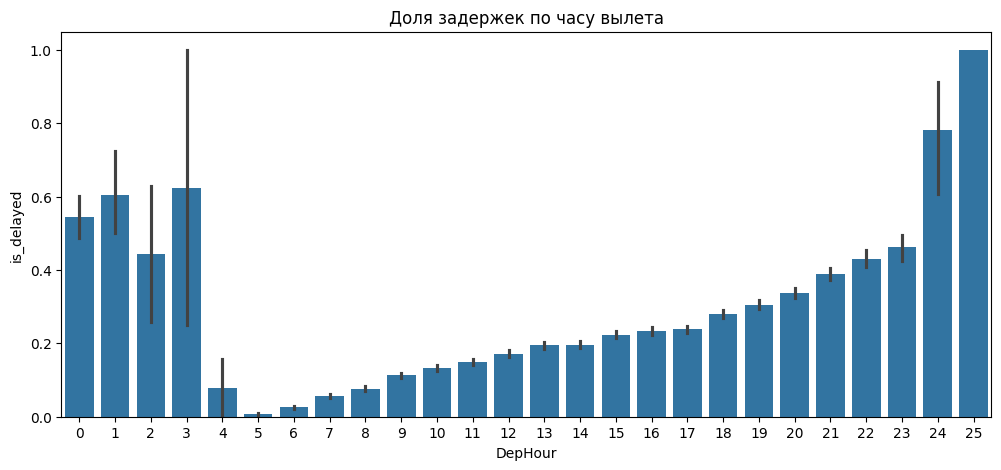

In [7]:
# Доля задержек по часу вылета
plt.figure(figsize=(12, 5))
sns.barplot(x='DepHour', y='is_delayed', data=train, estimator=lambda x: sum(x)/len(x))
plt.title('Доля задержек по часу вылета')
plt.show()

### Выводы по оптимизации расписания рейсов

1. **Время вылета**  
   Наибольшая доля задержек наблюдается в ночные и ранние утренние часы (0–4 и после 23 часов), а также в самом конце суток. В дневные и вечерние часы вероятность задержки постепенно увеличивается. Минимальная доля задержек — в утренние часы (5–8 часов).  
   **Рекомендация:** по возможности планировать рейсы на утренние и дневные часы, избегать ночных и поздних вылетов для маршрутов с высоким риском задержки.

2. **Дни недели**  
   Некоторые дни недели (например, конец и начало рабочей недели) могут иметь повышенную долю задержек.  
   **Рекомендация:** при планировании расписания учитывать пики задержек по дням недели, увеличивать резерв времени между рейсами в эти периоды.

3. **Маршруты и авиакомпании**  
   Есть маршруты и авиакомпании с систематически высокой долей задержек.  
   **Рекомендация:** для таких направлений и перевозчиков рассмотреть оптимизацию расписания, усиление наземного обслуживания и увеличение резервов времени.

4. **Временные слоты**  
   Вечерние и ночные временные слоты наиболее рискованные по задержкам.  
   **Рекомендация:** по возможности переносить рейсы с высоким риском задержки на утро или день.

**Общий вывод:**  
Оптимизация расписания с учетом выявленных паттернов (время суток, день недели, маршрут, авиакомпания) позволит снизить количество задержек и повысить пунктуальность рейсов.

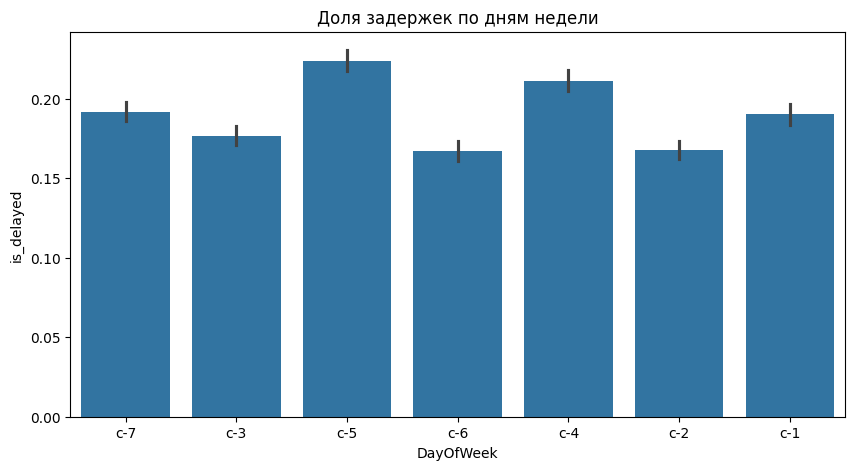

In [8]:
# Доля задержек по дням недели
plt.figure(figsize=(10, 5))
sns.barplot(x='DayOfWeek', y='is_delayed', data=train, estimator=lambda x: sum(x)/len(x))
plt.title('Доля задержек по дням недели')
plt.show()

### Выводы по анализу задержек по дням недели

На графике видно, что доля задержек рейсов зависит от дня недели. Наибольший процент задержек наблюдается в дни c-5 и c-4, что, вероятно, связано с увеличением пассажиропотока в конце и начале рабочей недели. В остальные дни недели доля задержек ниже и примерно одинакова.  
**Рекомендация:** при планировании расписания учитывать пики задержек по дням недели и увеличивать резерв времени между рейсами в эти периоды.

In [5]:
# Топ-10 маршрутов с наибольшей долей задержек
route_delay = train.groupby('Route')['is_delayed'].mean().sort_values(ascending=False).head(10)
print(route_delay)

# Топ-10 авиакомпаний с наибольшей долей задержек
carrier_delay = train.groupby('UniqueCarrier')['is_delayed'].mean().sort_values(ascending=False).head(10)
print(carrier_delay)


Route
DCA-ROC    1.0
ATL-CID    1.0
CID-ATL    1.0
DEN-GRR    1.0
TPA-RIC    1.0
RSW-CMH    1.0
JFK-CHS    1.0
GRB-DFW    1.0
BOS-TTN    1.0
DTW-SAV    1.0
Name: is_delayed, dtype: float64
UniqueCarrier
EV    0.275318
AS    0.243474
FL    0.242185
YV    0.224624
B6    0.213819
WN    0.213433
MQ    0.194545
UA    0.192263
AA    0.187938
CO    0.181818
Name: is_delayed, dtype: float64


### Выводы по маршрутам и авиакомпаниям с наибольшей долей задержек

**Маршруты:**  
Топ-10 маршрутов с максимальной долей задержек имеют показатель 1.0, то есть на этих направлениях все рейсы были задержаны. Это может быть связано с особенностями аэропортов, погодными условиями, логистикой или другими локальными причинами.  
**Рекомендация:** Для этих маршрутов стоит пересмотреть расписание, увеличить резерв времени между рейсами, усилить наземное обслуживание или рассмотреть альтернативные временные слоты для вылетов.

**Авиакомпании:**  
Среди авиакомпаний наибольшая доля задержек у EV, AS, FL, YV, B6. У этих перевозчиков вероятность задержки выше средней по выборке.  
**Рекомендация:** Авиакомпаниям с высокой долей задержек рекомендуется провести внутренний аудит процессов, оптимизировать расписание и обратить особое внимание на проблемные маршруты и временные интервалы.

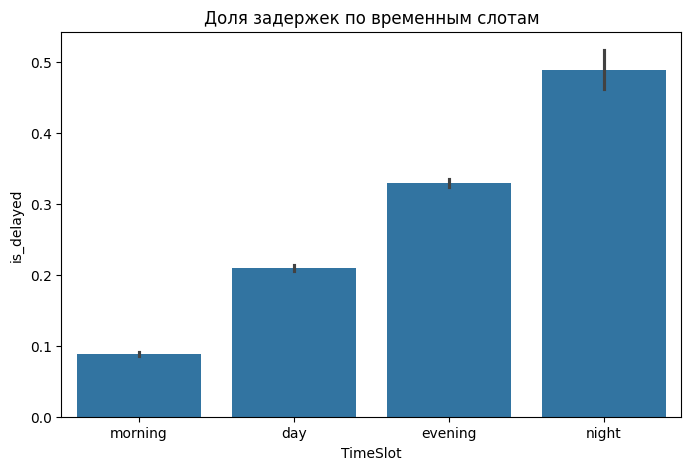

In [6]:
def time_slot(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'day'
    elif 18 <= hour < 23:
        return 'evening'
    else:
        return 'night'

train['TimeSlot'] = train['DepHour'].apply(time_slot)

# Доля задержек по временным слотам
plt.figure(figsize=(8, 5))
sns.barplot(x='TimeSlot', y='is_delayed', data=train, order=['morning', 'day', 'evening', 'night'])
plt.title('Доля задержек по временным слотам')
plt.show()

### Выводы по анализу задержек по временным слотам

На графике видно, что вероятность задержки рейса существенно зависит от времени суток. Минимальная доля задержек наблюдается в утренние часы (morning), затем она увеличивается в дневные (day) и вечерние (evening) слоты, а максимальная — в ночные часы (night).  
**Рекомендация:** по возможности планировать рейсы на утренние и дневные временные слоты, а для маршрутов с высоким риском задержки избегать вечерних и ночных вылетов.